In [1]:
import princess as ohm
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable,Chain,config

60000 784


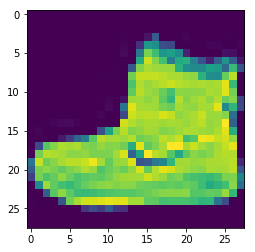

In [2]:
train,test = ds.get_fashion_mnist()
xtrain,ttrain = con.concat_examples(train)
xtest,ttest = con.concat_examples(test)

Dtrain,N = xtrain.shape
print(Dtrain,N)
plt.imshow(xtrain[0,:].reshape(28,28))
plt.show()

In [7]:
C = ttrain.max()+1

NN=Chain(l1=L.Linear(N,400),l2=L.Linear(400,C),bnorm1=L.BatchNormalization(400))

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    y=NN.l2(h)
    return y

#gpu_device=0
#cuda.get_device(gpu_device).use()

optNN = Opt.MomentumSGD()
optNN.setup(NN)

train_loss=[]
train_acc=[]
test_loss=[]
test_acc=[]
data=[xtrain,xtest,ttrain,ttest]
result=[train_loss,test_loss,train_acc,test_acc]

In [8]:
def learning_classification(model,optNN,data,result,T=10):
    for time in range(T):
        config.train = True
        optNN.target.cleargrads()
        ytrain=model(data[0])
        loss_train= F.softmax_cross_entropy(ytrain,data[2])
        acc_train = F.accuracy(ytrain,data[2])
        loss_train.backward()
        optNN.update()
        
        config.train = False
        ytest = model(data[1])
        loss_test=F.softmax_cross_entropy(ytest,data[3])
        acc_test=F.accuracy(ytest,data[3])
        result[0].append(loss_train.data)
        result[1].append(loss_test.data)
        result[2].append(acc_train.data)
        result[3].append(acc_test.data) 

In [9]:
def plot_result2(result1,result2,title,xlabel,ylabel,ymin=0.0,ymax=1.0):
    Tall = len(result1)
    plt.plot(range(Tall),result1)
    plt.plot(range(Tall),result2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([0,Tall])
    plt.ylim([ymin,ymax])
    plt.show()

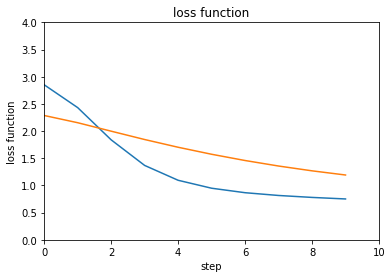

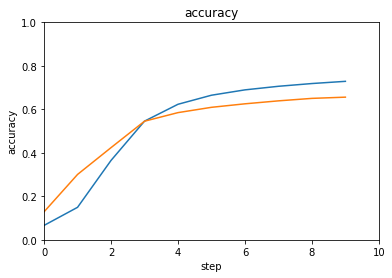

In [10]:
ohm.learning_classification(model,optNN,data,result,10)
ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,4.0)
ohm.plot_result2(result[2],result[3],'accuracy','step','accuracy')